In [205]:
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.width = 500

In [206]:
df = pd.read_csv('../data/food_ratings - DS003.csv', index_col='student')
print(df.head(2))
df.drop(['age', 'favorite_color'], axis=1, inplace=True)
df.head(2)

         broccoli  brussels_sprouts  hamburger  oysters (raw)   onion (raw)  peas  olives  blue_cheese  whiskey  age favorite_color
student                                                                                                                            
Akbar           7                 0          5              2             3     4       8            8        7   32           Blue
Andreas         7                 7          7              1             7     3       3            5        7   34           Blue


,broccoli,brussels_sprouts,hamburger,oysters (raw),onion (raw),peas,olives,blue_cheese,whiskey
student,,,,,,,,,
Akbar,7,0,5,2,3,4,8,8,7
Andreas,7,7,7,1,7,3,3,5,7


In [207]:
sample = df.iloc[0:2,0:2]
sample

,broccoli,brussels_sprouts
student,,
Akbar,7,0
Andreas,7,7


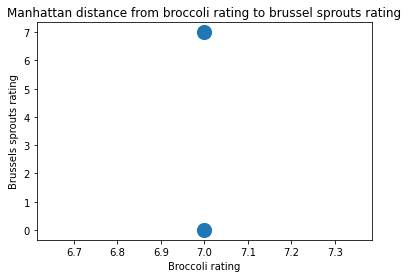

In [208]:
# plot the manhattan distance between two points
# plt.scatter(x, y, s = size(of dots on the chart))
plt.scatter(sample['broccoli'], sample['brussels_sprouts'], s=200)

# labelling the chart
# plt.xlim(-1, 11)
# plt.ylim(-1, 11)
plt.title('Manhattan distance from broccoli rating to brussel sprouts rating')
plt.xlabel('Broccoli rating')
plt.ylabel('Brussels sprouts rating')
plt.show()

In [209]:
sample = df.iloc[0:2,0:3]
sample

,broccoli,brussels_sprouts,hamburger
student,,,
Akbar,7,0,5
Andreas,7,7,7


In [210]:
# distance user 1 and user 2 for broccoli
md_m1_users1to2 = abs(sample.iloc[0,0] - sample.iloc[1,0])
md_m1_users1to2

0

In [211]:
# distance user 1 and user 2 for brussel_sprouts
md_m2_users1to2 = abs(sample.iloc[0,1] - sample.iloc[1,1])
md_m2_users1to2

7

In [212]:
# distance user 1 and user 2 for hamburguer
md_m3_users1to2 = abs(sample.iloc[0,2] - sample.iloc[1,2])
md_m3_users1to2

2

In [213]:
# and now to calculate the distance between both users, it will be
md_users1to2 = md_m1_users1to2 + md_m2_users1to2 + md_m3_users1to2
md_users1to2

9

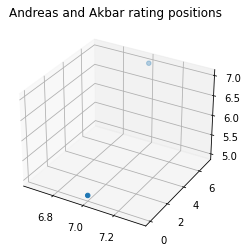

In [214]:
# how can we visualize that?
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.title('Andreas and Akbar rating positions')
ax.scatter(xs=sample['broccoli'], ys=sample['brussels_sprouts'], zs=sample['hamburger'])
plt.show()

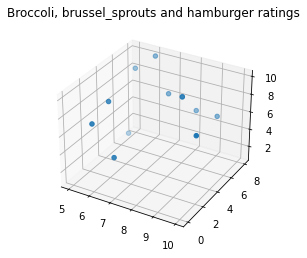

In [215]:
# 3d visualisation of all participant for Broccoli, Brussel Sprouts, and Hamburgers
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.title('Broccoli, brussel_sprouts and hamburger ratings')
ax.scatter(xs=df['broccoli'], ys=df['brussels_sprouts'], zs=df['hamburger'])
plt.show()

In [216]:
sample = df.iloc[0:,0:3]
sample

,broccoli,brussels_sprouts,hamburger
student,,,
Akbar,7,0,5
Andreas,7,7,7
Dónal,8,6,8
Hana,5,8,8
Konstantinos,5,7,1
Kristina,9,8,5
Sabrina,6,8,10
Sandrine,10,2,8
Sevgi,6,2,9


### Calculate the Manhattan distance

$$d =  {\left| {x_1 - x_2 } \right| + \left| {y_1 - y_2 } \right| }$$

In [217]:
sample = df.iloc[0:,0:3]
results = {
    'comparison': [],
    'Manhattan_distance': []
}
for i in range(len(sample.index)):
    for j in range(i, len(sample.index)):
        if i != j:
            results['comparison'].append(sample.iloc[i].name+' vs '+sample.iloc[j].name)
            results['Manhattan_distance'].append(sum(abs(sample.iloc[i] - sample.iloc[j])))
            
results = pd.DataFrame(results).set_index('comparison')
results

,Manhattan_distance
comparison,
Akbar vs Andreas,9
Akbar vs Dónal,10
Akbar vs Hana,13
Akbar vs Konstantinos,13
Akbar vs Kristina,10
...,...
Sevgi vs Ben,12
Sevgi vs Joan,3
Rias vs Ben,5


<AxesSubplot:xlabel='student_2', ylabel='student_1'>

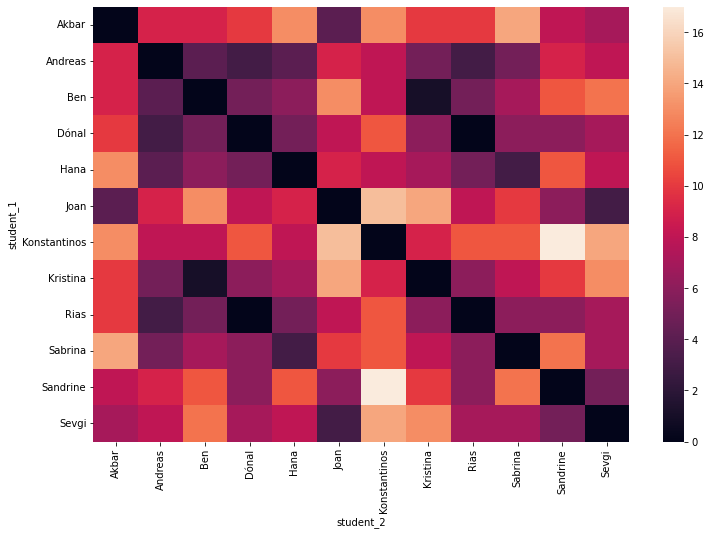

In [218]:
# The same code but with a pivot table
sample = df.iloc[0:,0:3]
results = {
    'student_1': [],
    'student_2': [],
    'Manhattan_distance': []
}
for i in range(len(sample.index)):
    for j in range(len(sample.index)):
        results['student_1'].append(sample.iloc[i].name)
        results['student_2'].append(sample.iloc[j].name)
        results['Manhattan_distance'].append(sum(abs(sample.iloc[i] - sample.iloc[j])))
            
student_Manhattan_distance = pd.DataFrame(results)
student_Manhattan_distance_pivot_table = pd.pivot_table(student_Manhattan_distance, 
                                                        values='Manhattan_distance', 
                                                        index='student_1',
                                                        columns='student_2')
plt.subplots(figsize=(12,8))
sns.heatmap(student_Manhattan_distance_pivot_table)

### Calculate the Euclidean distance


$$d = \sqrt {\left( {x_1 - x_2 } \right)^2 + \left( {y_1 - y_2 } \right)^2 }$$

In [219]:
sample = df.iloc[0:,0:3]
results = {
    'comparison': [],
    'Euclidean_distance': []
}
for i in range(len(sample.index)):
    for j in range(i, len(sample.index)):
        if i != j:
            results['comparison'].append(sample.iloc[i].name+' vs '+sample.iloc[j].name)
            results['Euclidean_distance'].append(math.sqrt(sum((sample.iloc[i] - sample.iloc[j])**2)))
            
results = pd.DataFrame(results).set_index('comparison')
results

,Euclidean_distance
comparison,
Akbar vs Andreas,7.280110
Akbar vs Dónal,6.782330
Akbar vs Hana,8.774964
Akbar vs Konstantinos,8.306624
Akbar vs Kristina,8.246211
...,...
Sevgi vs Ben,7.483315
Sevgi vs Joan,2.236068
Rias vs Ben,3.605551


,Euclidean_distance
comparison,
Akbar vs Andreas,7.280110
Akbar vs Dónal,6.782330
Akbar vs Hana,8.774964
Akbar vs Konstantinos,8.306624
Akbar vs Kristina,8.246211
...,...
Joan vs Sabrina,8.246211
Joan vs Sandrine,4.472136
Joan vs Sevgi,2.236068


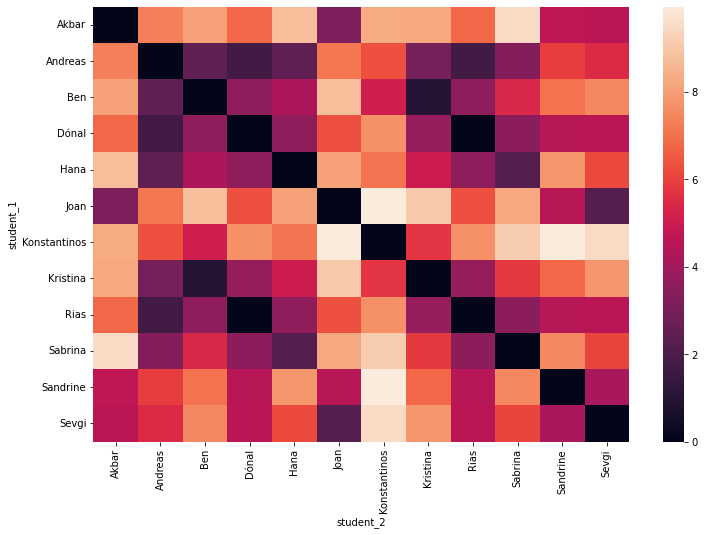

In [220]:
sample = df.iloc[0:,0:3]
heatmap_results = {
    'student_1': [],
    'student_2': [],
    'Euclidean_distance': []
}
results = {
    'comparison': [],
    'Euclidean_distance': []
}

for i in range(len(sample.index)):
    for j in range(len(sample.index)):
        heatmap_results['student_1'].append(sample.iloc[i].name)
        heatmap_results['student_2'].append(sample.iloc[j].name)
        heatmap_results['Euclidean_distance'].append(math.sqrt(sum((sample.iloc[i] - sample.iloc[j])**2)))
        
        if i != j:
            results['comparison'].append(sample.iloc[i].name+' vs '+sample.iloc[j].name)
            results['Euclidean_distance'].append(math.sqrt(sum((sample.iloc[i] - sample.iloc[j])**2)))
            
student_Euclidean_distance = pd.DataFrame(heatmap_results)
student_Euclidean_distance_pivot_table = pd.pivot_table(student_Euclidean_distance, 
                                                        values='Euclidean_distance', 
                                                        index='student_1',
                                                        columns='student_2')
plt.subplots(figsize=(12,8))
sns.heatmap(student_Euclidean_distance_pivot_table)

results = pd.DataFrame(results).set_index('comparison')
results

### Range scaling

In [221]:
df

,broccoli,brussels_sprouts,hamburger,oysters (raw),onion (raw),peas,olives,blue_cheese,whiskey
student,,,,,,,,,
Akbar,7,0,5,2,3,4,8,8,7
Andreas,7,7,7,1,7,3,3,5,7
Dónal,8,6,8,5,1,5,8,10,10
Hana,5,8,8,8,5,7,9,8,7
Konstantinos,5,7,1,0,7,8,10,2,7
Kristina,9,8,5,0,7,7,9,4,7
Sabrina,6,8,10,0,8,8,10,0,2
Sandrine,10,2,8,0,5,8,10,10,0
Sevgi,6,2,9,0,5,7,10,0,0


In [222]:
# Normalize with respect to the max
df_1 = df.copy()
df_1 = df_1/df_1.max()
df_1

,broccoli,brussels_sprouts,hamburger,oysters (raw),onion (raw),peas,olives,blue_cheese,whiskey
student,,,,,,,,,
Akbar,0.7,0.000,0.5,0.250,0.375,0.444444,0.8,0.8,0.7
Andreas,0.7,0.875,0.7,0.125,0.875,0.333333,0.3,0.5,0.7
Dónal,0.8,0.750,0.8,0.625,0.125,0.555556,0.8,1.0,1.0
Hana,0.5,1.000,0.8,1.000,0.625,0.777778,0.9,0.8,0.7
Konstantinos,0.5,0.875,0.1,0.000,0.875,0.888889,1.0,0.2,0.7
Kristina,0.9,1.000,0.5,0.000,0.875,0.777778,0.9,0.4,0.7
Sabrina,0.6,1.000,1.0,0.000,1.000,0.888889,1.0,0.0,0.2
Sandrine,1.0,0.250,0.8,0.000,0.625,0.888889,1.0,1.0,0.0
Sevgi,0.6,0.250,0.9,0.000,0.625,0.777778,1.0,0.0,0.0


In [223]:
# Normalize the range to scale from the min value to the max value
df_2 = df.copy()
df_2 = (df_2-df_2.min())/(df_2.max()-df_2.min())
df_2

,broccoli,brussels_sprouts,hamburger,oysters (raw),onion (raw),peas,olives,blue_cheese,whiskey
student,,,,,,,,,
Akbar,0.4,0.000,0.444444,0.250,0.375,0.285714,0.714286,0.8,0.7
Andreas,0.4,0.875,0.666667,0.125,0.875,0.142857,0.000000,0.5,0.7
Dónal,0.6,0.750,0.777778,0.625,0.125,0.428571,0.714286,1.0,1.0
Hana,0.0,1.000,0.777778,1.000,0.625,0.714286,0.857143,0.8,0.7
Konstantinos,0.0,0.875,0.000000,0.000,0.875,0.857143,1.000000,0.2,0.7
Kristina,0.8,1.000,0.444444,0.000,0.875,0.714286,0.857143,0.4,0.7
Sabrina,0.2,1.000,1.000000,0.000,1.000,0.857143,1.000000,0.0,0.2
Sandrine,1.0,0.250,0.777778,0.000,0.625,0.857143,1.000000,1.0,0.0
Sevgi,0.2,0.250,0.888889,0.000,0.625,0.714286,1.000000,0.0,0.0


## Import the Spotify audio data and compute the Euclidean and Manhattan distances of each pair of songs

In [224]:
df_audio_features = pd.read_csv("../data/spotify/audio_features_10.csv",
                                index_col=["song_name", "artist"])
df_audio_features.head(2)

,,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
song_name,artist,,,,,,,,,,,,,
My Band,D12,0.851,0.849,1,-3.383,0,0.0828,0.4970,0.000002,0.1160,0.844,120.014,298773,4
The Real Slim Shady,Eminem,0.949,0.661,5,-4.244,0,0.0572,0.0302,0.000000,0.0454,0.760,104.504,284200,4


#### Normalize the data

In [225]:
audio_features = df_audio_features.copy()

# Rescale the loudness column because it is on the negative scale
audio_features.loudness = audio_features.loudness + (0 - audio_features.loudness.min())

# Rescale every column wrt the max
audio_features = audio_features/audio_features.max()
audio_features

,,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
song_name,artist,,,,,,,,,,,,,
My Band,D12,0.896733,1.000000,0.125,1.000000,0.0,0.591429,0.502020,0.000002,0.290727,0.906552,0.756275,0.681011,1.00
The Real Slim Shady,Eminem,1.000000,0.778563,0.625,0.971414,0.0,0.408571,0.030505,0.000000,0.113784,0.816327,0.658538,0.647794,1.00
Águas De Março,Antônio Carlos Jobim,0.676502,0.399293,0.375,0.597610,1.0,1.000000,0.862626,0.000000,0.263158,0.527390,0.903756,0.484136,1.00
The Girl From Ipanema,Stan Getz,0.675448,0.164900,1.000,0.554880,1.0,0.278571,0.875758,0.001818,0.263158,0.416756,0.814904,0.724806,1.00
"Paint It, Black",The Rolling Stones,0.488936,0.936396,0.125,0.804648,1.0,0.661429,0.049798,0.002673,1.000000,0.657358,1.000000,0.461039,1.00
Sultans Of Swing,Dire Straits,0.772392,0.935218,0.625,0.779548,1.0,0.219286,0.062020,0.040197,0.827068,1.000000,0.933727,0.794639,1.00
Space Raiders - Charlotte de Witte Remix,Eats Everything,0.789252,0.861013,0.500,0.751594,1.0,0.771429,0.003172,0.949617,0.278195,0.064232,0.831786,1.000000,1.00
In Silence,Amelie Lens,0.775553,0.995289,0.125,0.713347,1.0,0.269286,0.005535,0.986857,0.278195,0.212675,0.806656,0.897474,1.00
"Wiegenlied, Op. 49, No. 4 (Arr. for Cello and Piano) [Brahms Lullaby]",Johannes Brahms,0.193888,0.009812,0.375,0.000000,1.0,0.370714,0.998990,0.652793,0.260652,0.226638,0.387804,0.250274,0.75


#### Manhattan distance

,Manhattan_distance
comparison,
Nocturne en mi bémol majeur opus 9 n°2: Ballade en Sol Mineur No.1 vs Águas De Março,0
Águas De Março vs Nocturne en mi bémol majeur opus 9 n°2: Ballade en Sol Mineur No.1,0
Nocturne en mi bémol majeur opus 9 n°2: Ballade en Sol Mineur No.1 vs The Real Slim Shady,3
Space Raiders - Charlotte de Witte Remix vs The Girl From Ipanema,3
Águas De Março vs The Real Slim Shady,3
...,...
"Paint It, Black vs Wiegenlied, Op. 49, No. 4 (Arr. for Cello and Piano) [Brahms Lullaby]",14
"Wiegenlied, Op. 49, No. 4 (Arr. for Cello and Piano) [Brahms Lullaby] vs Paint It, Black",14
Space Raiders - Charlotte de Witte Remix vs My Band,14


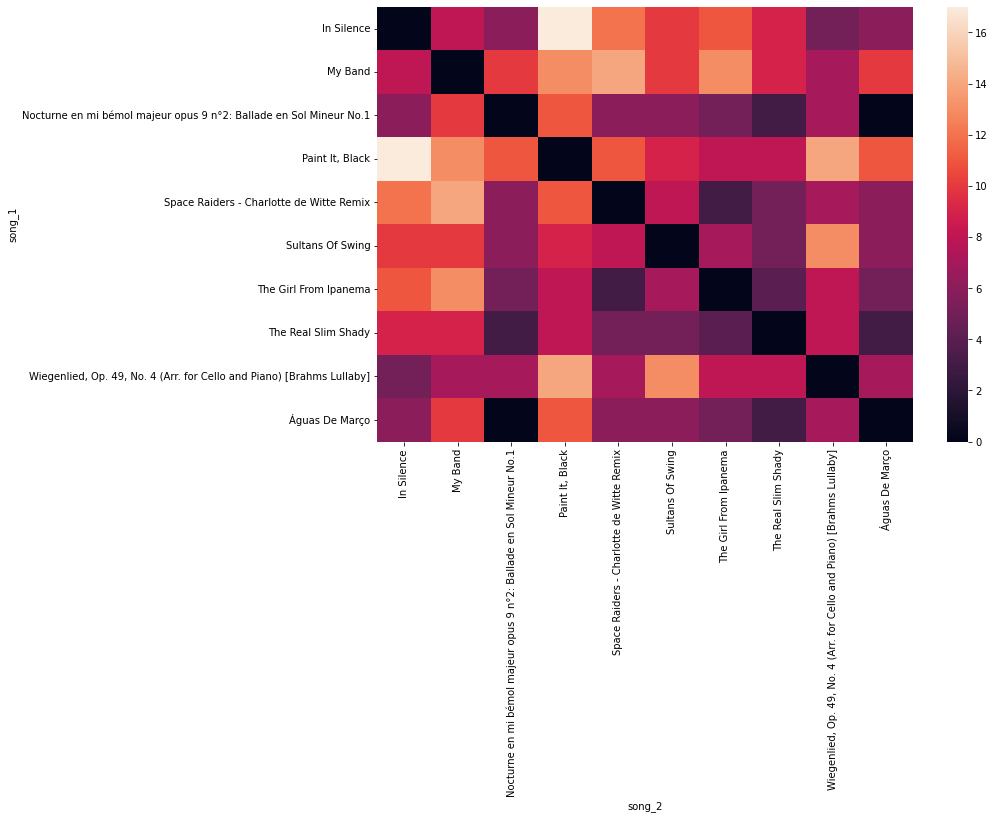

In [226]:
sample = df.iloc[0:,0:3]
heatmap_results = {
    'song_1': [],
    'song_2': [],
    'Manhattan_distance': []
}
results = {
    'comparison': [],
    'Manhattan_distance': []
}

for i in range(len(audio_features.index)):
    for j in range(len(audio_features.index)):
        heatmap_results['song_1'].append(audio_features.iloc[i].name[0])
        heatmap_results['song_2'].append(audio_features.iloc[j].name[0])
        heatmap_results['Manhattan_distance'].append(sum(abs(sample.iloc[i] - sample.iloc[j])))
        
        if i != j:
            results['comparison'].append(audio_features.iloc[i].name[0]+' vs '+audio_features.iloc[j].name[0])
            results['Manhattan_distance'].append(sum(abs(sample.iloc[i] - sample.iloc[j])))
            
Manhattan_distance = pd.DataFrame(heatmap_results)
Manhattan_distance_pivot_table = pd.pivot_table(Manhattan_distance, 
                                                values='Manhattan_distance', 
                                                index='song_1',
                                                columns='song_2')
plt.subplots(figsize=(12,8))
sns.heatmap(Manhattan_distance_pivot_table)

Manhattan_results = pd.DataFrame(results).set_index('comparison')
Manhattan_results.sort_values('Manhattan_distance', inplace=True)
Manhattan_results

In [227]:
# Find the shortest Manhattan distance for each song
best_Manhattan = pd.DataFrame()
for song in audio_features.index:
    song_results_df = Manhattan_distance[(Manhattan_distance.song_1==song[0])&(Manhattan_distance.song_2!=song[0])]
    best_Manhattan = best_Manhattan.append(song_results_df[song_results_df.Manhattan_distance==song_results_df.Manhattan_distance.min()])

print(best_Manhattan.drop_duplicates("Manhattan_distance"))

                 song_1                                             song_2  Manhattan_distance
8               My Band  Wiegenlied, Op. 49, No. 4 (Arr. for Cello and ...                   7
12  The Real Slim Shady                                     Águas De Março                   3
29       Águas De Março  Nocturne en mi bémol majeur opus 9 n°2: Ballad...                   0
41      Paint It, Black                                The Real Slim Shady                   8
51     Sultans Of Swing                                The Real Slim Shady                   5


,Euclidean_distance
comparison,
In Silence vs Space Raiders - Charlotte de Witte Remix,0.668598
"Nocturne en mi bémol majeur opus 9 n°2: Ballade en Sol Mineur No.1 vs Wiegenlied, Op. 49, No. 4 (Arr. for Cello and Piano) [Brahms Lullaby]",0.694369
The Real Slim Shady vs My Band,0.785101
"Sultans Of Swing vs Paint It, Black",0.889391
The Girl From Ipanema vs Águas De Março,1.022782
"Águas De Março vs Paint It, Black",1.331907
The Real Slim Shady vs Sultans Of Swing,1.338431
Nocturne en mi bémol majeur opus 9 n°2: Ballade en Sol Mineur No.1 vs The Girl From Ipanema,1.366568
"The Girl From Ipanema vs Wiegenlied, Op. 49, No. 4 (Arr. for Cello and Piano) [Brahms Lullaby]",1.381362


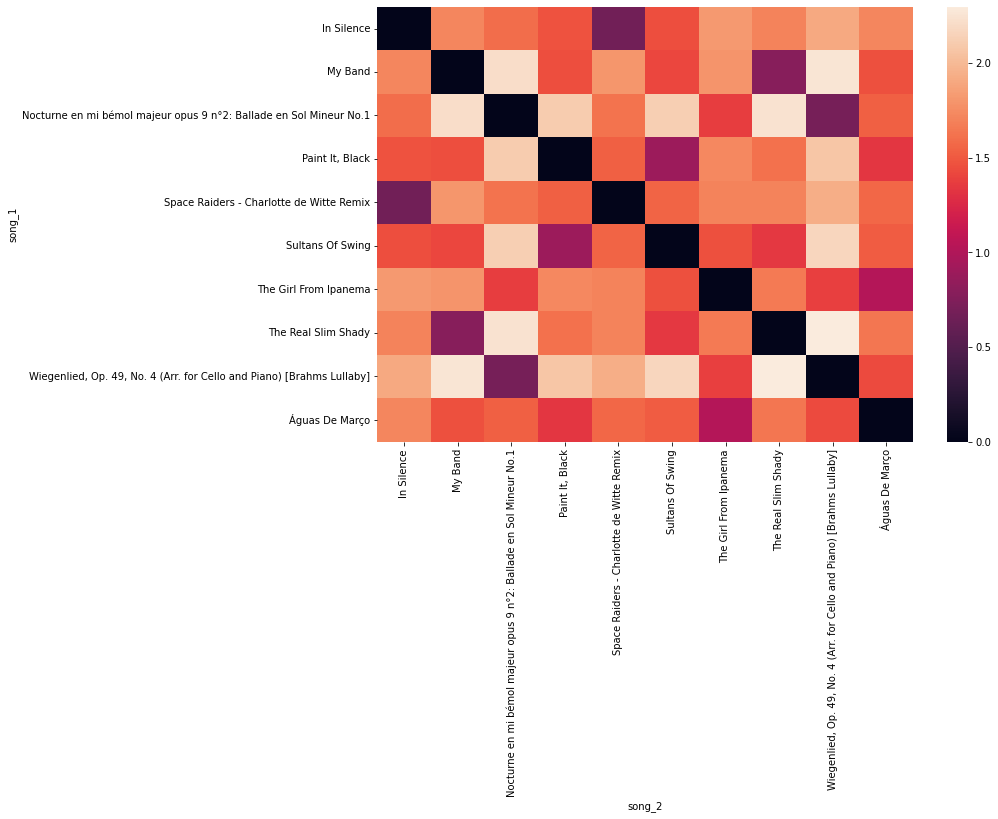

In [228]:
sample = df.iloc[0:,0:3]
heatmap_results = {
    'song_1': [],
    'song_2': [],
    'Euclidean_distance': []
}
results = {
    'comparison': [],
    'Euclidean_distance': []
}

for i in range(len(audio_features.index)):
    for j in range(len(audio_features.index)):
        heatmap_results['song_1'].append(audio_features.iloc[i].name[0])
        heatmap_results['song_2'].append(audio_features.iloc[j].name[0])
        heatmap_results['Euclidean_distance'].append(math.sqrt(sum((audio_features.iloc[i] - audio_features.iloc[j])**2)))
        
        if i != j:
            results['comparison'].append(audio_features.iloc[i].name[0]+' vs '+audio_features.iloc[j].name[0])
            results['Euclidean_distance'].append(math.sqrt(sum((audio_features.iloc[i] - audio_features.iloc[j])**2)))
            
Euclidean_distance = pd.DataFrame(heatmap_results)
Euclidean_distance_pivot_table = pd.pivot_table(Euclidean_distance, 
                                                values='Euclidean_distance', 
                                                index='song_1',
                                                columns='song_2')
plt.subplots(figsize=(12,8))
sns.heatmap(Euclidean_distance_pivot_table)

Euclidean_results = pd.DataFrame(results).set_index('comparison')

Euclidean_results.sort_values('Euclidean_distance', ascending=True,  inplace=True)
Euclidean_results.head(20).drop_duplicates()

In [229]:
# Find the shortest Euclidean distance for each song
best_Euclidean = pd.DataFrame()
for song in audio_features.index:
    song_results_df = Euclidean_distance[(Euclidean_distance.song_1==song[0])&(Euclidean_distance.song_2!=song[0])]
    best_Euclidean = best_Euclidean.append(song_results_df[song_results_df.Euclidean_distance==song_results_df.Euclidean_distance.min()])

print(best_Euclidean.drop_duplicates("Euclidean_distance"))

                                               song_1                                             song_2  Euclidean_distance
1                                             My Band                                The Real Slim Shady            0.785101
23                                     Águas De Março                              The Girl From Ipanema            1.022782
45                                    Paint It, Black                                   Sultans Of Swing            0.889391
67           Space Raiders - Charlotte de Witte Remix                                         In Silence            0.668598
89  Wiegenlied, Op. 49, No. 4 (Arr. for Cello and ...  Nocturne en mi bémol majeur opus 9 n°2: Ballad...            0.694369


<AxesSubplot:xlabel='comparison'>

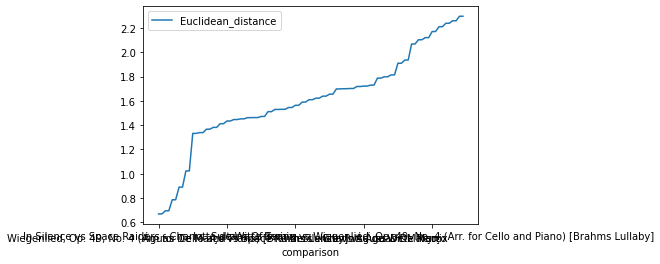

In [230]:
Euclidean_results.plot()

<AxesSubplot:xlabel='comparison'>

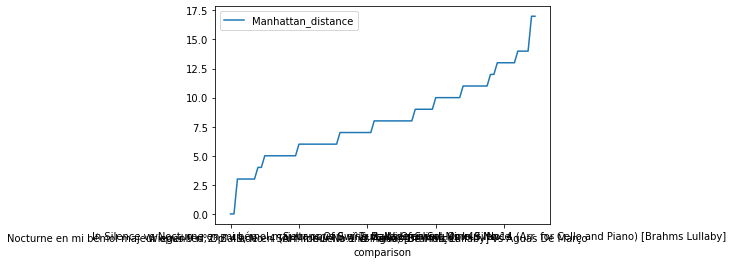

In [231]:
Manhattan_results.plot()

<AxesSubplot:xlabel='comparison'>

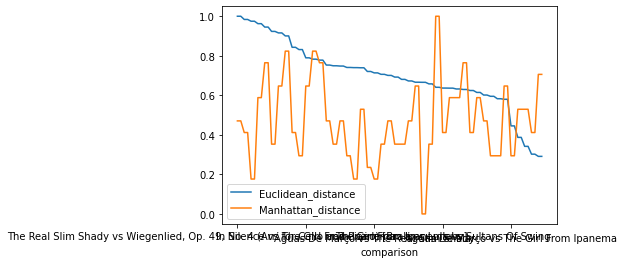

In [232]:
combined_results = pd.concat([Euclidean_results, Manhattan_results], axis=1).sort_values('Euclidean_distance', ascending=False)
combined_results = combined_results/combined_results.max()
combined_results.plot()

## Results
From examining the heatmaps we see that the Euclidean distance gave far better results. After plotting the results of the two methods together we see that the Manhattan results do not correlate to the Euclidean results.